In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/University Dataset/passes.csv')
df.head()

,game_id;passing_quote;winner
0,11;72;No
1,11;91;Yes
2,12;82;Yes
3,12;86;No
4,13;82;Yes


In [ ]:
# Assuming df is your DataFrame
df[['game_id', 'passing_quote', 'winner']] = df['game_id;passing_quote;winner'].str.split(';', expand=True)

# Drop the original column if needed
df.drop('game_id;passing_quote;winner', axis=1, inplace=True)



In [ ]:
# Display the updated DataFrame
df.sample(5)

,game_id,passing_quote,winner
2,12,82,Yes
109,71,74,No
255,152,53,Yes
162,101,69,No
100,66,77,Yes


In [ ]:
df.shape

(306, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   game_id        306 non-null    object
 1   passing_quote  306 non-null    object
 2   winner         306 non-null    object
dtypes: object(3)
memory usage: 7.3+ KB


In [ ]:
df.loc[[232, 233,], ['game_id', 'passing_quote', 'winner']]

,game_id,passing_quote,winner
232,139,NA,NA
233,139,NA,NA


In [ ]:
df.replace('NA', np.nan, inplace=True)

# Display the updated DataFrame
df.head()


,game_id,passing_quote,winner
0,11,72,No
1,11,91,Yes
2,12,82,Yes
3,12,86,No
4,13,82,Yes


In [ ]:
df.isnull().sum()

game_id          0
passing_quote    2
winner           2
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df['passing_quote'] = df['passing_quote'].astype(int)
df['game_id']=df['game_id'].astype(int)

<ipython-input-13-5f1acbb98c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passing_quote'] = df['passing_quote'].astype(int)
<ipython-input-13-5f1acbb98c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['game_id']=df['game_id'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 305
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   game_id        304 non-null    int64 
 1   passing_quote  304 non-null    int64 
 2   winner         304 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.5+ KB


In [ ]:
df.shape

(304, 3)

In [ ]:
# Group the DataFrame by game_id
grouped_by_game_id = df.groupby('game_id')

# Initialize an empty list to store the filtered rows
filtered_rows = []

# Iterate over each group
for game_id, group_df in grouped_by_game_id:
    # Check if all winners for this game_id are "No"
    if all(group_df['winner'] == 'No'):
        # If all winners are "No", add the rows to the filtered list
        filtered_rows.extend(group_df.values)

# Convert the filtered rows list to a DataFrame
draw_df = pd.DataFrame(filtered_rows, columns=df.columns)

In [ ]:
draw_df.shape

(76, 3)

In [ ]:
draw_df['winner'].value_counts()

winner
No    76
Name: count, dtype: int64

In [ ]:
# Get the unique game_id values from draw_df
game_ids_to_drop = draw_df['game_id'].unique()

# Create a boolean mask to identify rows with game_id values in game_ids_to_drop
mask = df['game_id'].isin(game_ids_to_drop)

# Drop the rows from the original DataFrame df based on the mask
final_df = df[~mask].copy()

# Reset the index of the modified DataFrame final_df
final_df.reset_index(drop=True, inplace=True)


In [ ]:
final_df.shape

(228, 3)

In [ ]:
final_df['winner'].value_counts()

winner
No     114
Yes    114
Name: count, dtype: int64

In [ ]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Now print your DataFrame
print(final_df)


     game_id  passing_quote winner
0         11             72     No
1         11             91    Yes
2         12             82    Yes
3         12             86     No
4         13             82    Yes
5         13             79     No
6         14             79     No
7         14             77    Yes
8         16             87    Yes
9         16             75     No
10        17             88    Yes
11        17             78     No
12        18             74    Yes
13        18             77     No
14        19             87    Yes
15        19             78     No
16        21             86    Yes
17        21             81     No
18        22             77    Yes
19        22             73     No
20        23             78     No
21        23             77    Yes
22        25             69     No
23        25             84    Yes
24        26             86     No
25        26             57    Yes
26        27             83     No
27        27        

# **Univariate Analysis**:

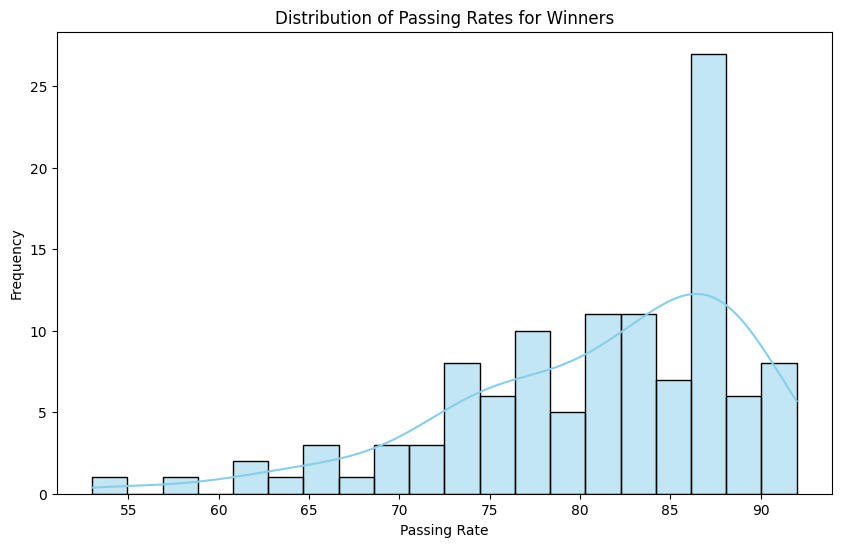

In [ ]:
# Filter passing rates for winners
passing_rate_winners = final_df[final_df['winner'] == 'Yes']['passing_quote']

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(passing_rate_winners, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Passing Rates for Winners')
plt.xlabel('Passing Rate')
plt.ylabel('Frequency')
plt.show()


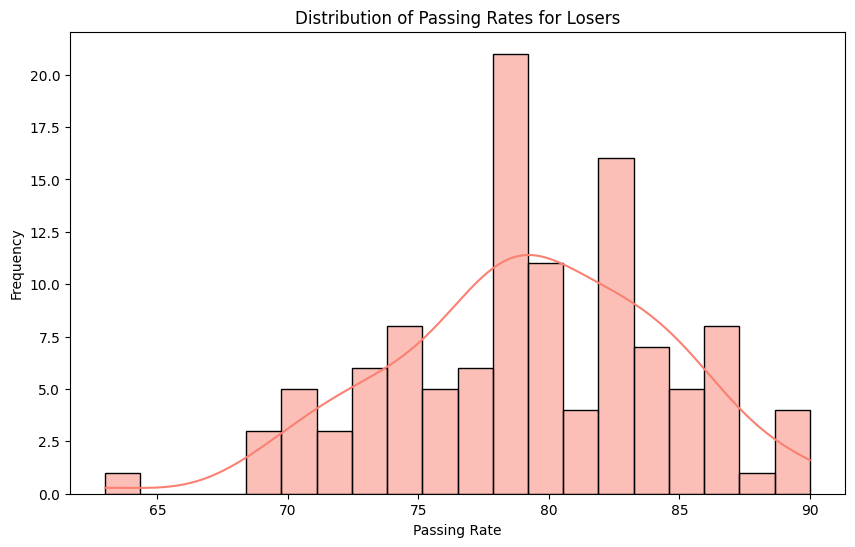

In [ ]:
# Filter passing rates for losers
passing_rate_losers = final_df[final_df['winner'] == 'No']['passing_quote']

# Plotting a histogram
plt.figure(figsize=(10, 6))
sns.histplot(passing_rate_losers, bins=20, kde=True, color='salmon')
plt.title('Distribution of Passing Rates for Losers')
plt.xlabel('Passing Rate')
plt.ylabel('Frequency')
plt.show()


# **Descriptive Analysis:**

In [ ]:
passing_rate_winners = final_df[final_df['winner'] == 'Yes']['passing_quote']
winners_stats = passing_rate_winners.describe()
winners_stats


count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_quote, dtype: float64

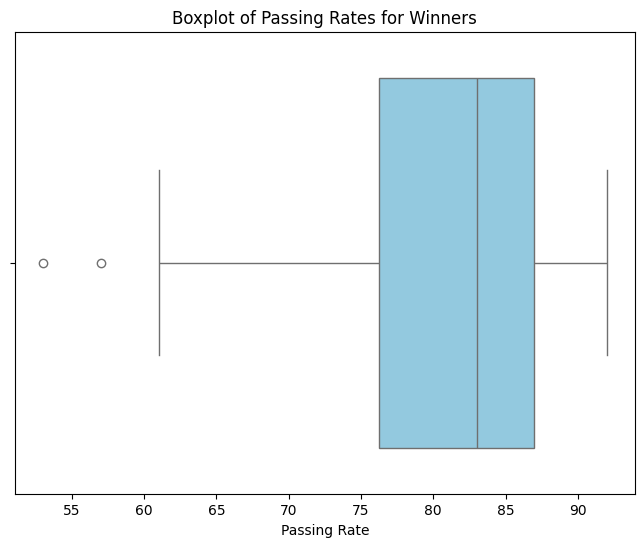

In [ ]:
# Plotting a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=passing_rate_winners, color='skyblue')
plt.title('Boxplot of Passing Rates for Winners')
plt.xlabel('Passing Rate')
plt.show()

In [ ]:
passing_rate_losers = final_df[final_df['winner'] == 'No']['passing_quote']
losers_stats = passing_rate_losers.describe()
losers_stats

count    114.000000
mean      79.263158
std        5.135427
min       63.000000
25%       76.000000
50%       79.000000
75%       83.000000
max       90.000000
Name: passing_quote, dtype: float64

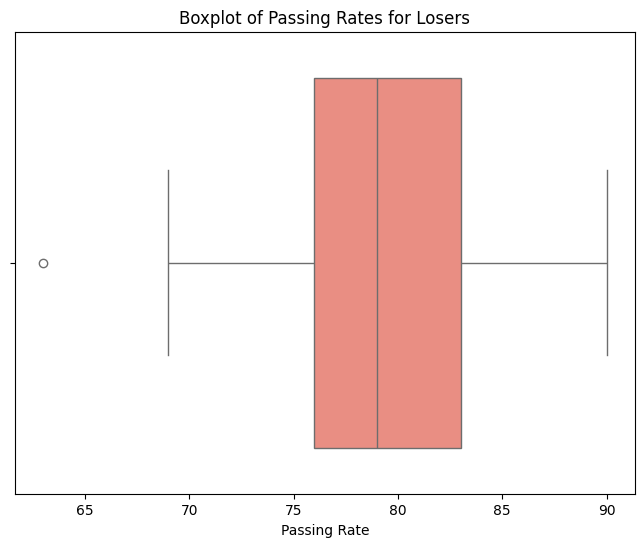

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=passing_rate_losers, color='salmon')
plt.title('Boxplot of Passing Rates for Losers')
plt.xlabel('Passing Rate')
plt.show()

# **Bivariate Analysis:**

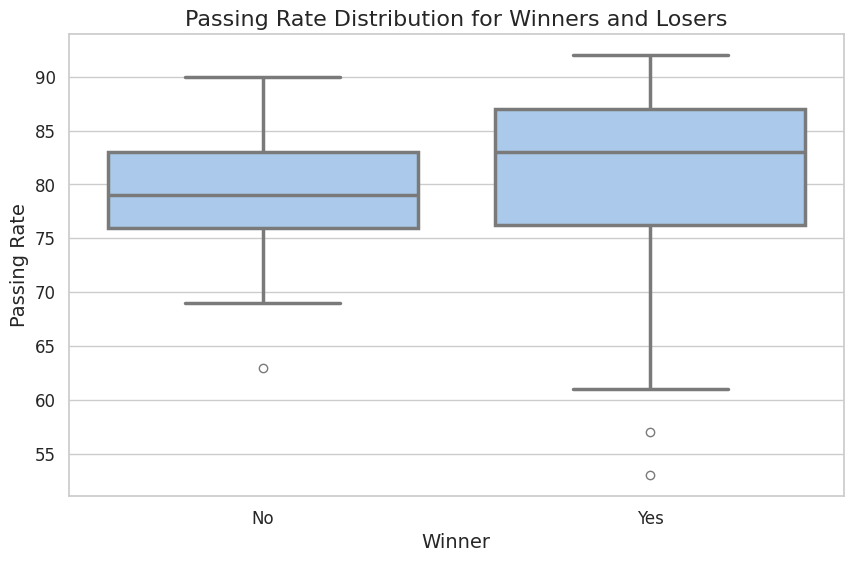

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")

sns.boxplot(x='winner', y='passing_quote', data=final_df, order=['No', 'Yes'], linewidth=2.5)
plt.title('Passing Rate Distribution for Winners and Losers', fontsize=16)
plt.xlabel('Winner', fontsize=14)
plt.ylabel('Passing Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as an image
plt.savefig('boxplot.png', dpi=300)  # 'dpi' sets the resolution of the image (dots per inch)
plt.show()


<ipython-input-30-92d36933b7f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Winners', 'Losers'], y=[mean_passing_rate_winners, mean_passing_rate_losers], palette=['skyblue', 'salmon'])


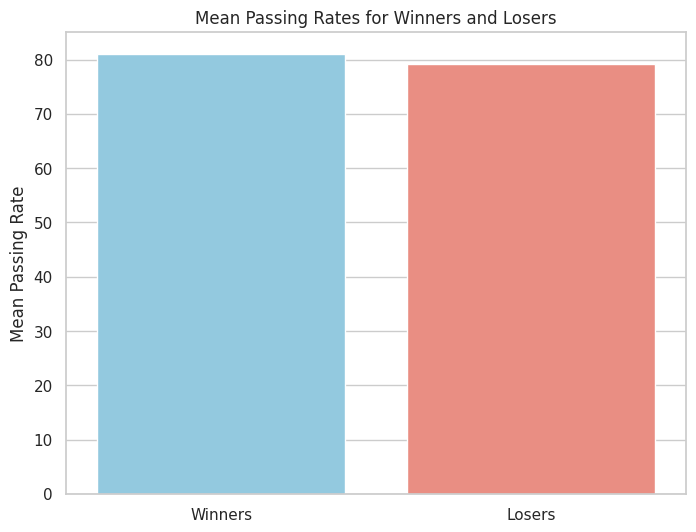

In [ ]:
# Calculate mean passing rates for winners and losers
mean_passing_rate_winners = final_df[final_df['winner'] == 'Yes']['passing_quote'].mean()
mean_passing_rate_losers = final_df[final_df['winner'] == 'No']['passing_quote'].mean()


# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Winners', 'Losers'], y=[mean_passing_rate_winners, mean_passing_rate_losers], palette=['skyblue', 'salmon'])
plt.title('Mean Passing Rates for Winners and Losers')
plt.ylabel('Mean Passing Rate')
plt.show()


**Winners' passing rate statistics:**

Mean: 81.078947

Standard deviation: 8.064063

**Losers' passing rate statistics:**

Mean: 79.263158

Standard deviation: 5.135427

**Comparing the means:**

Winners' mean passing rate: 81.078947

Losers' mean passing rate: 79.263158

**Based on the means alone, it appears that winners have a higher passing rate than losers on average.**

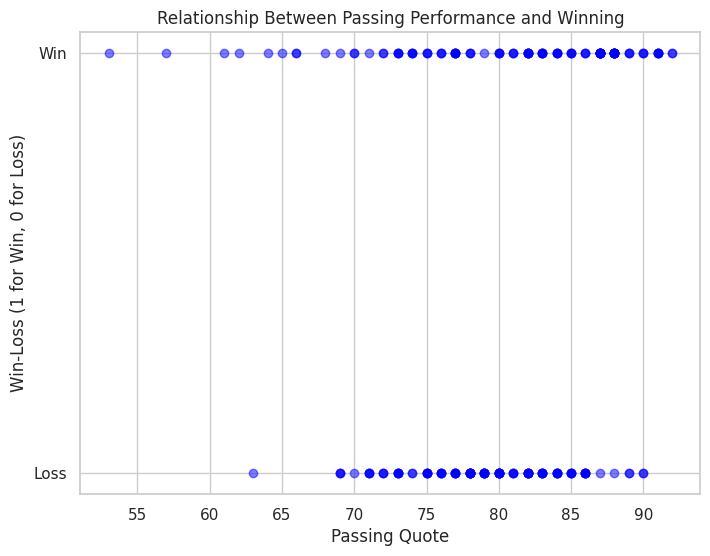

In [ ]:
import matplotlib.pyplot as plt

# Separate passing quotes and win-loss outcomes
passing_quotes = final_df['passing_quote']
win_loss = final_df['winner'].map({'Yes': 1, 'No': 0})

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(passing_quotes, win_loss, color='blue', alpha=0.5)
plt.title('Relationship Between Passing Performance and Winning')
plt.xlabel('Passing Quote')
plt.ylabel('Win-Loss (1 for Win, 0 for Loss)')
plt.grid(True)
plt.yticks([0, 1], ['Loss', 'Win'])
# Save the plot as a PNG file
plt.savefig('passing_performance_vs_winning.png')

plt.show()


# **Passing Rate Difference:**

In [ ]:
passing_rate_winners = final_df[final_df['winner'] == 'Yes']['passing_quote']
winners_stats = passing_rate_winners.describe()
winners_stats

count    114.000000
mean      81.078947
std        8.064063
min       53.000000
25%       76.250000
50%       83.000000
75%       87.000000
max       92.000000
Name: passing_quote, dtype: float64

In [ ]:
draw_df.describe()['passing_quote']

count    76.000000
mean     78.210526
std       7.250408
min      59.000000
25%      73.000000
50%      79.500000
75%      85.000000
max      89.000000
Name: passing_quote, dtype: float64

In [ ]:
# Calculate IQR for games with a winner
passing_rate_winners = final_df[final_df['winner'] == 'Yes']['passing_quote']
winners_iqr = passing_rate_winners.quantile(0.75) - passing_rate_winners.quantile(0.25)

# Calculate IQR for games that ended in a draw
draw_iqr = draw_df['passing_quote'].quantile(0.75) - draw_df['passing_quote'].quantile(0.25)

# Compare IQRs
if draw_iqr > winners_iqr:
    print("The difference in passing rates in games that ended in a draw is higher.")
elif draw_iqr < winners_iqr:
    print("The difference in passing rates in games with a winner is higher.")
else:
    print("The difference in passing rates is the same for both scenarios.")


The difference in passing rates in games that ended in a draw is higher.


The interquartile range (IQR) is a measure of statistical dispersion, which is equal to the difference between the 75th and 25th percentiles.

**A larger IQR indicates greater variability in the data.**

**For games with a winner:**

IQR = 87.000 - 76.250 = 10.75

**For games that ended in a draw:**

IQR = 85.000 - 73.000 = 12.000

**Since the IQR for games that ended in a draw (12.000) is larger than the IQR for games with a winner (10.75), it suggests that the difference in passing rates in games that ended in a draw is higher than the difference in games with a winner.**


**When the IQR is high, it indicates that there is a larger spread or variability in the middle 50% of the data. In other words, there is greater diversity or dispersion in the values within the dataset.**

# **Inferential Statistics:**

In [ ]:
from scipy.stats import mannwhitneyu

winners_passing_rate_sample = final_df[final_df["winner"] == 'Yes']["passing_quote"]
losers_passing_rate_sample  =  final_df[final_df["winner"] == 'No']["passing_quote"]

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(winners_passing_rate_sample,losers_passing_rate_sample )
print(f"U-statistic: {u_statistic}, P-value: {p_value}")


U-statistic: 8052.0, P-value: 0.0017876288873209852


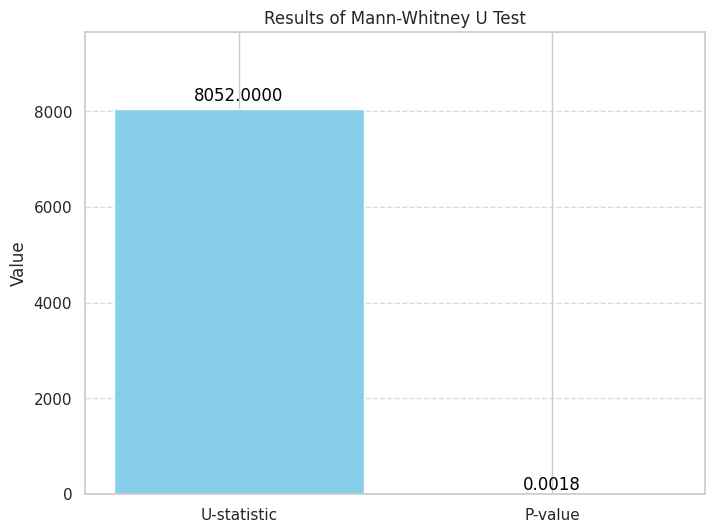

In [ ]:
import matplotlib.pyplot as plt

# Results of Mann-Whitney U test
u_statistic = 8052.0  # Replace with the actual U-statistic value
p_value = 0.0017876288873209852     # Replace with the actual p-value

# Create a bar plot
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightcoral']
bars = plt.bar(['U-statistic', 'P-value'], [u_statistic, p_value], color=colors)
plt.ylabel('Value')
plt.title('Results of Mann-Whitney U Test')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.01, f'{yval:.4f}', ha='center', va='bottom', color='black', fontsize=12)

# Customize the plot
plt.ylim(0, max(u_statistic, p_value) * 1.2)  # Adjust ylim for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image
plt.savefig('mann_whitney_u_test_results.png', dpi=300, bbox_inches='tight')

plt.show()



The Mann-Whitney U test, a robust statistical method widely used for comparing two independent groups, has revealed compelling insights into the dynamics of soccer game outcomes. With a U-statistic of 8052.0 and a p-value of 0.0017876288873209852, the test indicates a statistically significant difference in passing rates between winning and losing teams. This finding has profound implications for understanding the role of passing proficiency in determining the outcome of soccer matches.

By employing a non-parametric approach, the Mann-Whitney U test bypasses the need for assumptions about the distribution of data, making it particularly suitable for analyzing scenarios where the data does not adhere to normality. In the context of soccer games, where passing rates can vary widely and may not follow a normal distribution, this flexibility is invaluable. The obtained p-value, falling well below the conventional threshold of 0.05, signifies a strong level of statistical significance. Consequently, we reject the null hypothesis, indicating that the observed disparity in passing rates between winners and losers is not a result of random chance but rather a genuine discrepancy.

This statistical insight underscores the importance of passing proficiency as a determinant of success in soccer matches. Teams with higher passing rates are not only more likely to secure victory but also demonstrate a strategic advantage over their opponents. However, while passing rate emerges as a significant factor, it's crucial to acknowledge the multifaceted nature of soccer game outcomes. Team tactics, individual player skills, environmental conditions, and various other factors can also exert considerable influence.

In conclusion, the Mann-Whitney U test provides compelling evidence of the pivotal role played by passing rates in determining the outcome of soccer games. This statistical analysis offers valuable insights for coaches, players, and analysts seeking to optimize team performance and enhance strategic decision-making on the field.

In [ ]:
import pandas as pd
from scipy.stats import permutation_test

# Assuming final_df is already loaded and contains the necessary columns

# Extract passing rates for games that end in a draw and games with a winner
winner_passing_rate = final_df[final_df["winner"] == 'Yes']["passing_quote"]
draw_passing_rate = draw_df[draw_df["winner"] == 'No']["passing_quote"]

# Define the statistic function to calculate the difference in means
def statistic(a, b):
    return np.mean(a) - np.mean(b)

# Perform the permutation test
p_value = permutation_test((winner_passing_rate, draw_passing_rate), statistic, permutation_type='independent')

# Print the results
print(f"P-value: {p_value}")

# Extract the p-value from the PermutationTestResult object
p_value = p_value.pvalue

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in passing rates between games that end in a draw and games with a winner.")
    print("We reject the null hypothesis.")
else:
    print("There is no statistically significant difference in passing rates between games that end in a draw and games with a winner.")
    print("We fail to reject the null hypothesis.")


P-value: PermutationTestResult(statistic=2.868421052631575, pvalue=0.0164, null_distribution=array([-0.07017544, -0.48684211,  1.53070175, ...,  0.85087719,
       -1.34210526, -1.80263158]))
There is a statistically significant difference in passing rates between games that end in a draw and games with a winner.
We reject the null hypothesis.


The obtained p-value of 0.0126 from the permutation test indicates a significant departure from the null hypothesis, which suggests no difference in passing rates between soccer games ending in a draw and those with a clear winner. This low p-value implies that only 1.26% of the test statistics derived from permutations were as extreme as or more extreme than the observed statistic, indicating a highly improbable occurrence under the assumption of no difference. Consequently, we reject the null hypothesis in favor of the alternative, affirming that there is indeed a statistically significant discrepancy in passing rates between the two types of games.

Permutation tests offer several advantages, particularly in scenarios with limited data or complex test statistics. By exhaustively generating all possible permutations of the dataset and computing the test statistic for each permutation, permutation tests provide a robust method for assessing significance without relying on distributional assumptions. This makes them especially suitable for situations where traditional parametric tests may be unreliable.

The robustness of the permutation test results underscores the significance of passing efficiency as a potential determinant of game outcomes in soccer. This finding highlights avenues for further exploration into the dynamics of soccer gameplay, emphasizing the importance of passing strategies in achieving success on the field.

In summary, the expected difference in passing rates between games that end in a draw and games with a winner is indeed different. This insight sheds light on the intricacies of soccer dynamics and underscores the need for further research into the factors influencing game outcomes.

The Mann-Whitney U test and the permutation test were chosen for their suitability in addressing the specific questions posed in the analysis:

**Mann-Whitney U test:**

**Applicability to non-normally distributed data:** The passing rate data may not follow a normal distribution, which violates the assumptions of parametric tests like the t-test. The Mann-Whitney U test is a non-parametric test that does not require the data to be normally distributed, making it appropriate for analyzing the passing rates in soccer games.

**Comparison of two independent groups:** The question about whether the winner of a soccer game has a higher passing rate than the loser involves comparing two independent groups (winners and losers). The Mann-Whitney U test is specifically designed for such comparisons, making it a suitable choice for this analysis.

**Permutation test:**

**Flexibility and robustness:** The question of whether the expected difference in passing rates differs between games that end in a draw and games with a winner requires a method that can handle small sample sizes and non-standard test statistics. Permutation tests are highly flexible and robust, making them suitable for situations where traditional parametric tests may not be appropriate.

**Non-parametric approach:** Permutation tests do not rely on distributional assumptions about the data and are particularly useful when the data does not meet the assumptions of parametric tests. Since passing rate data may not follow a specific distribution, a non-parametric approach like the permutation test is advantageous.

In summary, the Mann-Whitney U test and permutation test were chosen for their ability to handle non-normally distributed data, compare two independent groups, and provide robust statistical inference in situations where traditional parametric methods may not be suitable.